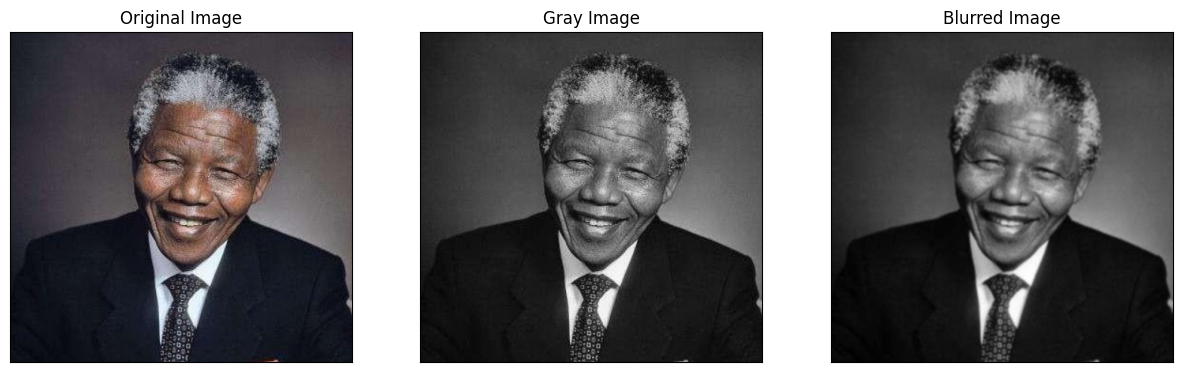

In [20]:
import cv2
import matplotlib.pyplot as plt

# 读取图像
image = cv2.imread('people.png', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# 灰度化
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# 高斯模糊
img_lurred = cv2.GaussianBlur(img_gray, (5, 5), 0)

plt.figure(figsize=(15, 5))
# 显示原始图像
plt.subplot(131), plt.imshow(img_rgb)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

# 显示灰度化后的图像
plt.subplot(132), plt.imshow(img_gray, cmap='gray')
plt.title('Gray Image'), plt.xticks([]), plt.yticks([])

# 显示高斯处理后的图像
plt.subplot(133), plt.imshow(img_lurred, cmap='gray')
plt.title('Blurred Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [17]:
# 加载OpenCV自带的人脸Haar级联分类器
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# 进行目标检测
faces = face_cascade.detectMultiScale(blurred, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

print("检测到的人脸矩形框坐标：", faces)

检测到的人脸矩形框坐标： [[149 103 195 195]]


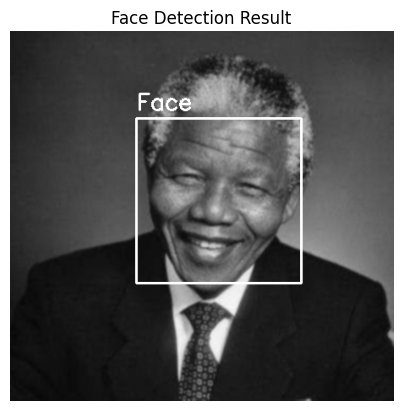

In [18]:
# 复制原始图像用于可视化
result_image = img_lurred.copy()

for (x, y, w, h) in faces:
    # 画矩形框
    cv2.rectangle(result_image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    # 标注标签
    cv2.putText(result_image, 'Face', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

# 将BGR图像转换为RGB图像以用于matplotlib显示
result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

# 显示结果图像
plt.imshow(result_image)
plt.title('Face Detection Result')
plt.axis('off')
plt.show()
    